Cleaning Data & Elaboratory Analaysis
(Evan Z & Eli A)

In [ ]:
import pandas as pd
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import pydotplus
from IPython.display import Image

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Summary Of Numerical Features

In [ ]:
df.describe().T.style.set_properties(
    **{
        'background-color': 'grey',
        'color': 'white',
        'border-color': 'white'
    }
)


,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


Data Cleaning

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

# no null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [ ]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)



Exploratory Analysis

In [ ]:
df2=df['HeartDisease'].value_counts().reset_index(name='count')
df2

,index,count
0,0,274456
1,1,27261


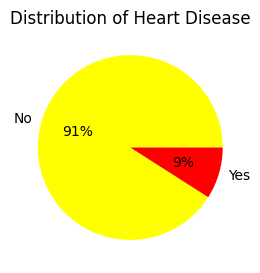

In [ ]:
plt.figure(figsize = (3,3))
plt.pie(df2['count'], labels=['No','Yes'], colors=["yellow","red"], autopct='%.0f%%')
plt.title('Distribution of Heart Disease')
plt.show()

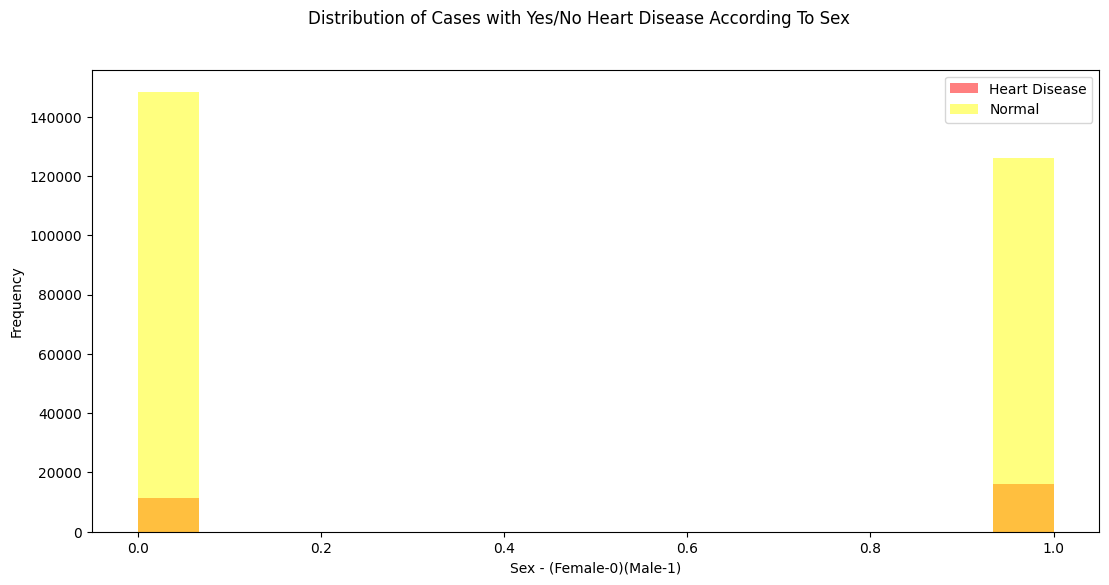

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(13, 6))

# Plot histograms with different colors (changed to red and yellow)
ax.hist(df[df["HeartDisease"] == 1]["Sex"], bins=15, alpha=0.5, color="red", label="Heart Disease")
ax.hist(df[df["HeartDisease"] == 0]["Sex"], bins=15, alpha=0.5, color="yellow", label="Normal")

# Set labels and title
ax.set_xlabel("Sex - (Female-0)(Male-1)")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Cases with Yes/No Heart Disease According To Sex")

# Add a legend
ax.legend()

# Show the plot
plt.show()

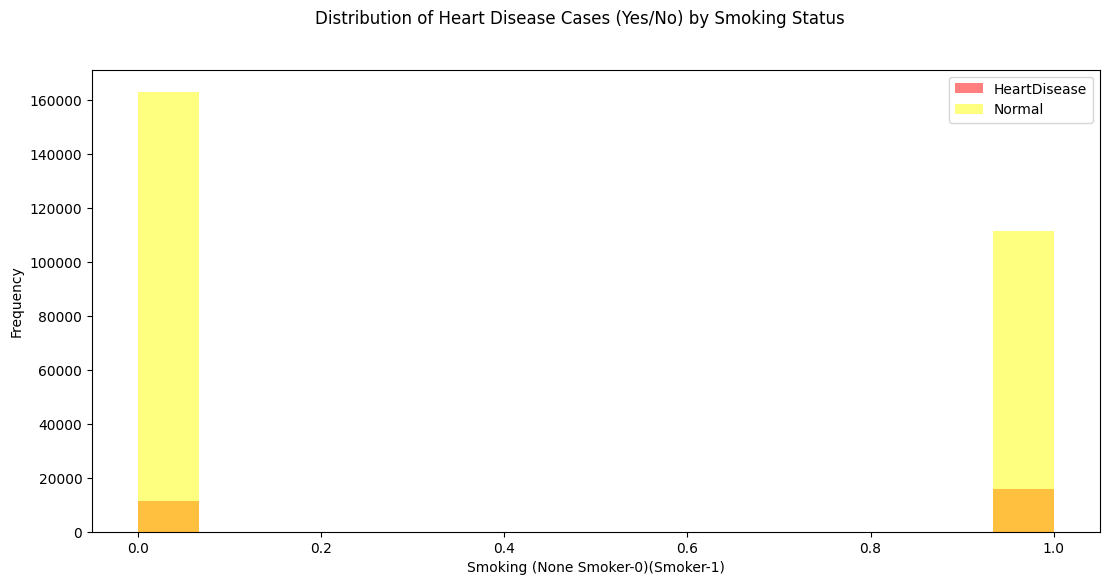

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(13, 6))

# Plot histograms for "HeartDisease" and "Normal" cases with different colors
ax.hist(df[df["HeartDisease"] == 1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"] == 0]["Smoking"], bins=15, alpha=0.5, color="yellow", label="Normal")

# Set labels and title
ax.set_xlabel("Smoking (None Smoker-0)(Smoker-1)")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Heart Disease Cases (Yes/No) by Smoking Status")

# Add a legend
ax.legend()

# Show the plot
plt.show()


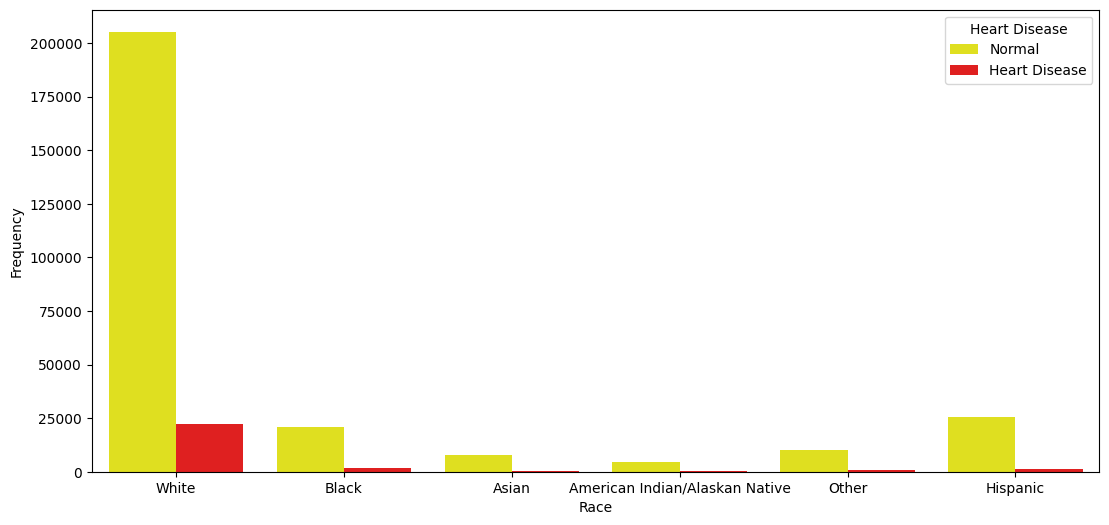

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(13, 6))

# Define custom colors for "No" (yellow) and "Yes" (red)
custom_colors = ['yellow', 'red']

# Create a stacked bar graph with custom colors
sns.countplot(x='Race', hue='HeartDisease', data=df, palette=custom_colors)

# Set labels
plt.xlabel('Race')
plt.ylabel('Frequency')

# Rename legend labels
legend_labels = ['Normal', 'Heart Disease']
plt.legend(legend_labels, title='Heart Disease')

# Show the plot
plt.show()

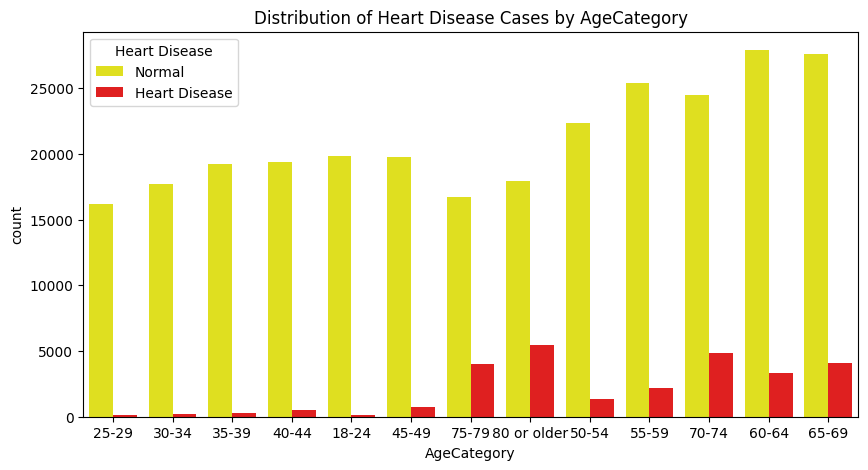

In [ ]:
# Calculate the counts of each AgeCategory and sort them in descending order
age_category_counts = df['AgeCategory'].value_counts().sort_values(ascending=True)
# Create a figure with a specific size
plt.figure(figsize=(10, 5))
# Create a countplot with the sorted order
sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", palette=["yellow", "red"], order=age_category_counts.index)
# Set a title
plt.title("Distribution of Heart Disease Cases by AgeCategory")
# Rename legend labels and add a legend title
legend_labels = ['Normal', 'Heart Disease']
plt.legend(legend_labels, title='Heart Disease')
# Show the plot
plt.show()

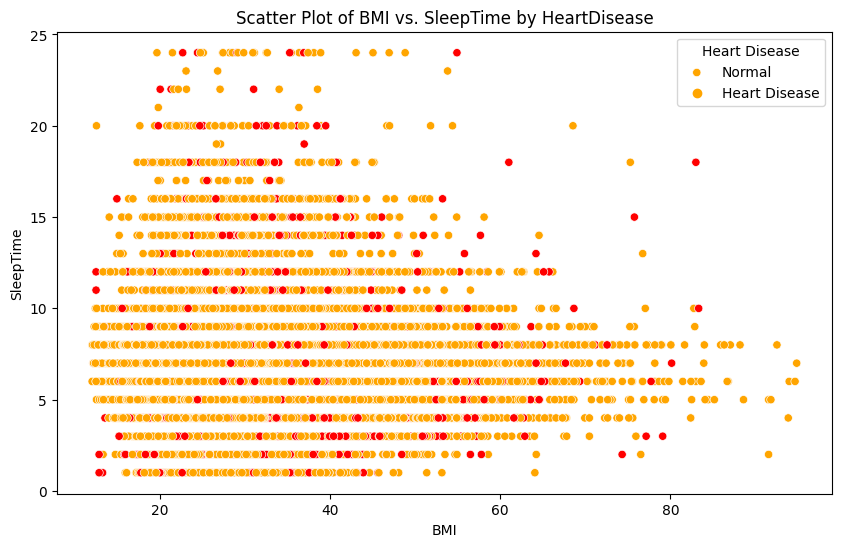

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a scatter plot with a different color scale
sns.scatterplot(data=df, x="BMI", y="SleepTime", hue="HeartDisease", palette={0: "orange", 1: "red"})

# Add a title
plt.title("Scatter Plot of BMI vs. SleepTime by HeartDisease")

# Rename legend labels and add a legend title
legend_labels = ['Normal', 'Heart Disease']
plt.legend(legend_labels, title='Heart Disease')

# Show the plot
plt.show()

<ipython-input-14-45c74d3db30b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 1]["BMI"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
<ipython-input-14-45c74d3db30b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 0]["BMI"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)


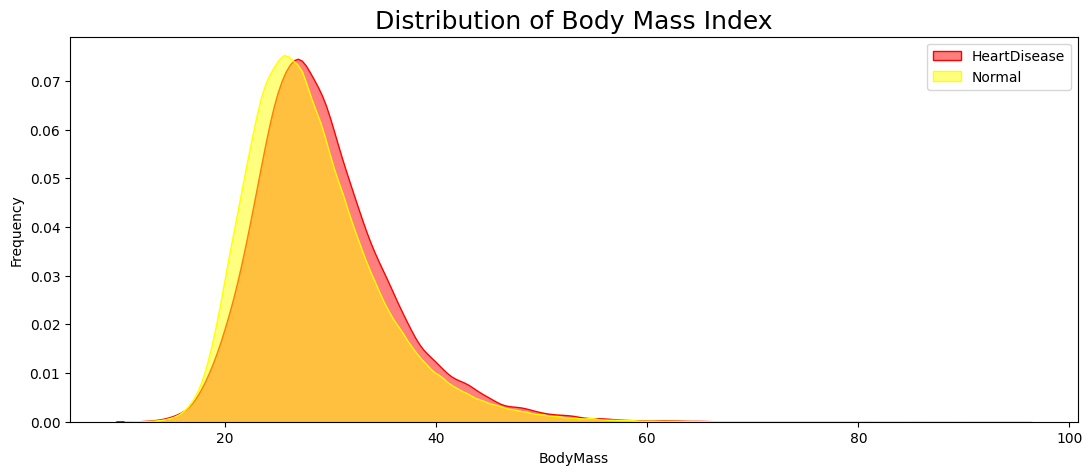

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(13, 5))

# Plot KDE (Kernel Density Estimation) for "HeartDisease" and "Normal" cases
sns.kdeplot(df[df["HeartDisease"] == 1]["BMI"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
sns.kdeplot(df[df["HeartDisease"] == 0]["BMI"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)

# Set the title and axis labels
plt.title('Distribution of Body Mass Index', fontsize=18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")

# Add a legend
ax.legend()

# Show the plot
plt.show()


<Axes: title={'center': 'GenHealth and HeartDisease'}, xlabel='GenHealth', ylabel='count'>

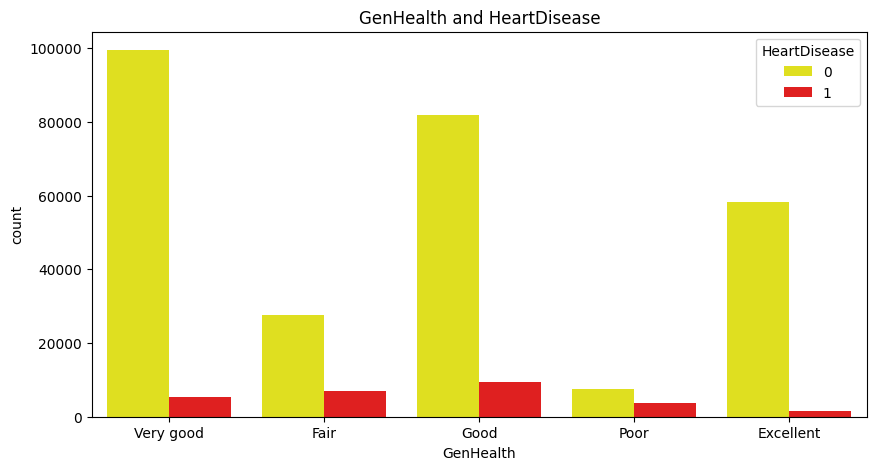

In [ ]:
plt.figure(figsize = (10,5))
plt.title("GenHealth and HeartDisease")
sns.countplot(df,x="GenHealth",hue="HeartDisease",palette=["yellow","red"])

<ipython-input-16-8e94a74aae53>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 1]["PhysicalHealth"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
<ipython-input-16-8e94a74aae53>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 0]["PhysicalHealth"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)


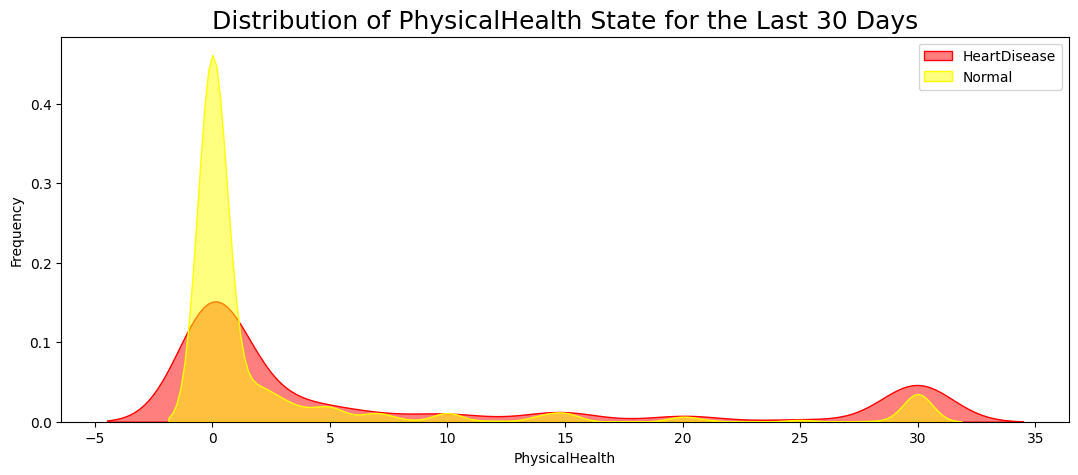

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(13, 5))

# Plot KDE (Kernel Density Estimation) for "HeartDisease" and "Normal" cases
sns.kdeplot(df[df["HeartDisease"] == 1]["PhysicalHealth"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
sns.kdeplot(df[df["HeartDisease"] == 0]["PhysicalHealth"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)

# Set the title and axis labels
plt.title('Distribution of PhysicalHealth State for the Last 30 Days', fontsize=18)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")

# Add a legend
ax.legend()

# Show the plot
plt.show()

<ipython-input-17-dcb50e1ef606>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 1]["SleepTime"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
<ipython-input-17-dcb50e1ef606>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 0]["SleepTime"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)


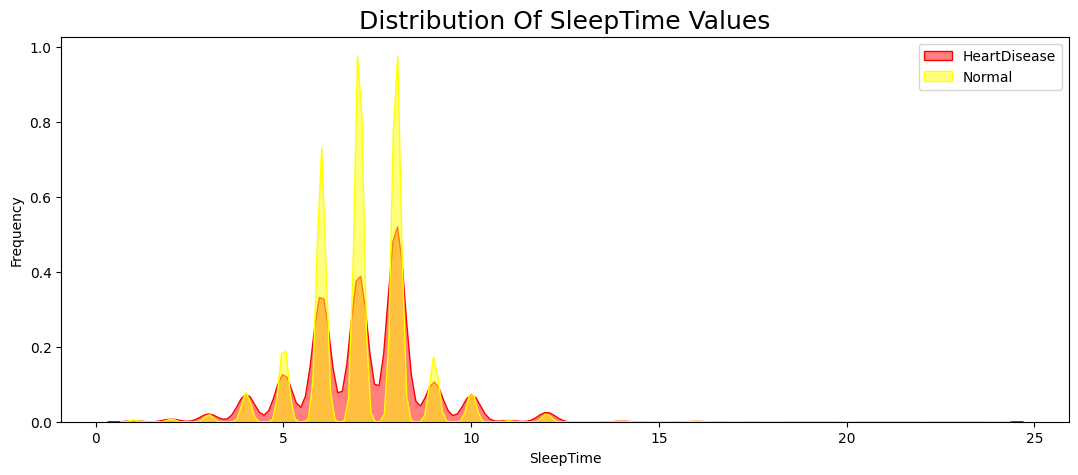

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(13, 5))

# Plot KDE (Kernel Density Estimation) for "HeartDisease" and "Normal" cases with yellow and red colors
sns.kdeplot(df[df["HeartDisease"] == 1]["SleepTime"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
sns.kdeplot(df[df["HeartDisease"] == 0]["SleepTime"], alpha=0.5, shade=True, color="yellow", label="Normal", ax=ax)

# Set the title and axis labels
plt.title('Distribution Of SleepTime Values', fontsize=18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")

# Add a legend
ax.legend()

# Show the plot
plt.show()

Correlation Between Variables

In [ ]:
# Create a copy of the DataFrame
data1 = df.copy()

# List of columns to label encode
columns_to_encode = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
    'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    le.fit(data1[column])
    data1[column] = le.transform(data1[column])

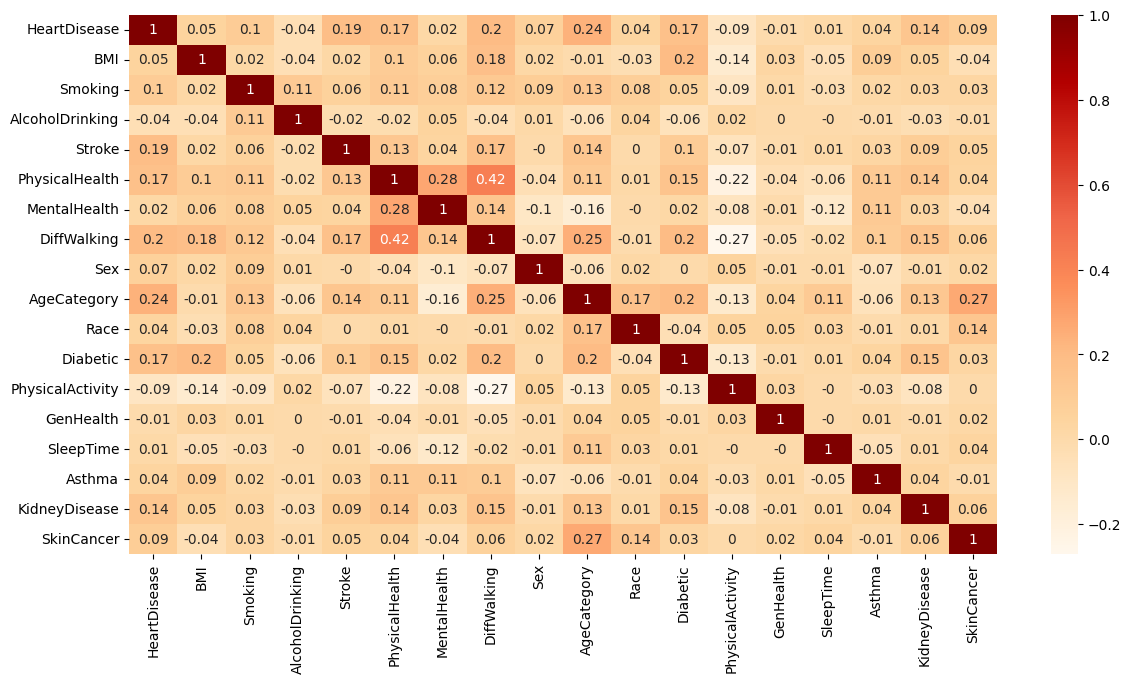

In [ ]:
# Calculate the correlation matrix and round to two decimal places
correlation = data1.corr().round(2)

# Create a heatmap to visualize correlations
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='OrRd')
plt.show()

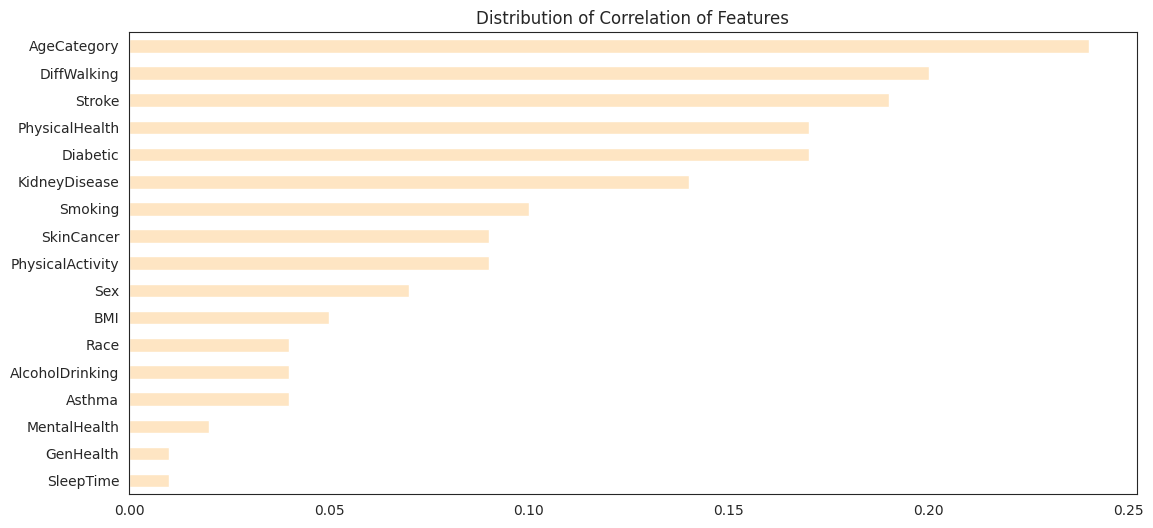

In [ ]:
# Set Seaborn style and palette
sns.set_style('white')
sns.set_palette('OrRd')

# Create a figure with a specific size
plt.figure(figsize=(13, 6))

# Set the title
plt.title('Distribution of Correlation of Features')

# Plot the horizontal bar chart
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()

# Show the plot
plt.show()

Machine Learning Prep (Briauna & Ridwaan):
1. See dataframe and convert type's into integers
2. Split Dataset for Training and Testing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [ ]:
#1. Making data readable to machine learning
df['AgeCategory'] = df['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39', '40-44', '25-29',
                                                           '30-34', '35-40', '41-44', '45-49', '50-54', '55-59',
                                                           '60-64', '65-69', '70-74', '75-79', '80 or older'],
                                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df['BMI'] = df['BMI'].replace(['15-18.5', '18.6-24.9', '25-29.9', '30-35', '36-39'],
                                                          [0, 1, 2, 3, 4])
df['Race'] = df['Race'].replace(['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'],
                                            [0, 1, 2, 3, 4, 5])
df['Diabetic'] = df['Diabetic'].replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'],
                                                    [0, 1, 2, 3])
df['GenHealth'] = df['GenHealth'].replace(['Excellent', 'Very good', 'Good', 'Fair','Poor'],
                                                      [0, 1, 2, 3, 4])


In [ ]:
# Extract the target variable 'HeartDisease' and the features from the heart_df DataFrame
target = df['HeartDisease']
features = df.drop(['HeartDisease'], axis=1)
# Import the SMOTE (Synthetic Minority Over-sampling Technique) from imblearn library
from imblearn.over_sampling import SMOTE
# Initialize the SMOTE object
smote = SMOTE()
# Apply SMOTE to balance the dataset
balanced_features, balanced_target = smote.fit_resample(features, target)
# Display the value counts of the balanced target variable
balanced_target.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

In [ ]:
#removing data that cannot be converted into get_dummies
#BMI doesn't effectively work when using get_dummies
DF3 = df.drop(columns=['BMI','PhysicalHealth', 'MentalHealth','SleepTime'])

In [ ]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   HeartDisease      301717 non-null  int64
 1   Smoking           301717 non-null  int64
 2   AlcoholDrinking   301717 non-null  int64
 3   Stroke            301717 non-null  int64
 4   DiffWalking       301717 non-null  int64
 5   Sex               301717 non-null  int64
 6   AgeCategory       301717 non-null  int64
 7   Race              301717 non-null  int64
 8   Diabetic          301717 non-null  int64
 9   PhysicalActivity  301717 non-null  int64
 10  GenHealth         301717 non-null  int64
 11  Asthma            301717 non-null  int64
 12  KidneyDisease     301717 non-null  int64
 13  SkinCancer        301717 non-null  int64
dtypes: int64(14)
memory usage: 34.5 MB


In [ ]:
# get dummies for train and test data
pd.get_dummies(DF3)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,11,0,1,1,1,1,0,1
1,0,0,0,1,0,0,16,0,0,1,1,0,0,0
2,0,1,0,0,0,1,13,0,1,1,3,1,0,0
3,0,0,0,0,0,0,15,0,0,0,2,0,0,1
4,0,0,0,0,1,0,4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,12,1,1,0,3,1,0,0
319791,0,1,0,0,0,1,3,1,0,1,1,1,0,0
319792,0,0,0,0,0,0,9,1,0,1,2,0,0,0
319793,0,0,0,0,0,0,5,1,0,0,2,0,0,0


Decision Tree model

In [ ]:
#split x(features) & y (targets)
y = DF3['HeartDisease']
X = DF3.drop(columns=['HeartDisease'])
#splitting data into testing & training data
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape,
      X_test.shape)

(226287, 13) (75430, 13)


In [ ]:
# Test Version vv
# Test orginal: model = DecisionTreeClassifier(random_state = 12, max_depth = 5, min_samples_leaf= 10, ccp_alpha, min_weight_fraction_leaf=,min_impurity_decrease=,max_features=max_leaf_nodes=)
# model = DecisionTreeClassifier(random_state = 12, max_depth = 5, min_samples_leaf= 10,min_impurity_decrease= 0, ccp_alpha=05)

#Correct Version  vv
model = DecisionTreeClassifier(random_state = 12, max_depth=5, min_samples_leaf= 10)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=12)

In [ ]:
model_dot = export_graphviz(model, out_file = None, feature_names = X.columns, class_names = ["no heart disease","has heart disease"], filled = True)

graph = pydotplus.graph_from_dot_data(model_dot)
image = Image(graph.create_png())

View decision tree

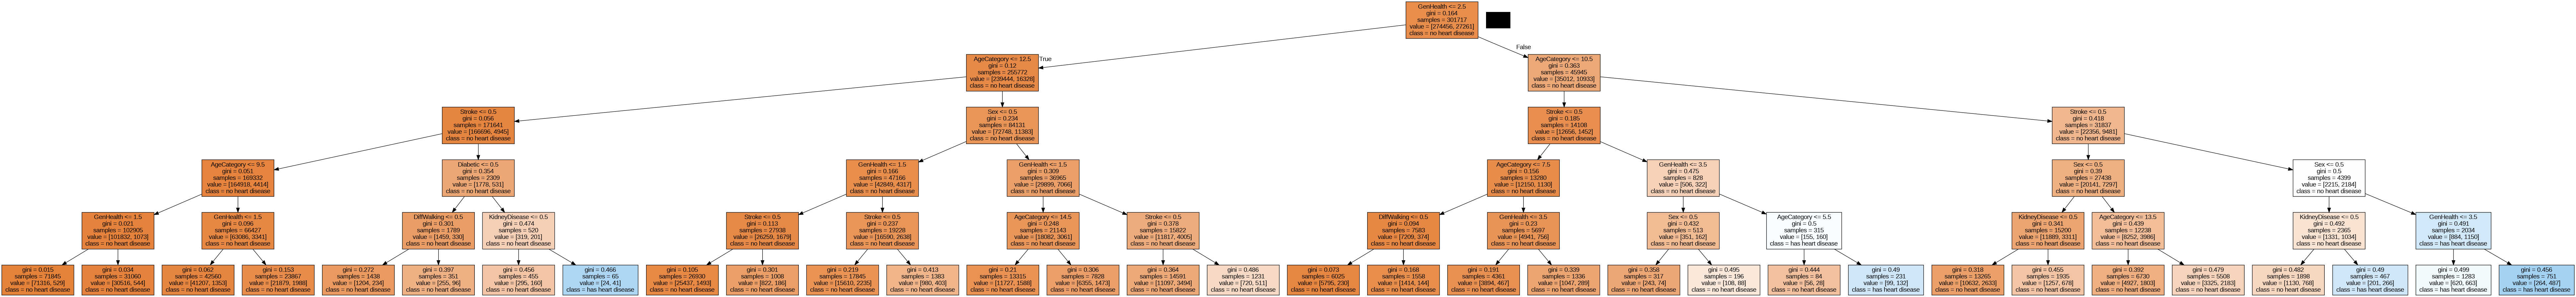

In [ ]:
image

In [ ]:
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Testing Data Score: 0.9094524724910513


This decision tree is 92% accurate.

In [ ]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

target_names = ["No Heart Disease", "Heart Disease"]
print(classification_report(y_test, predictions, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.91      1.00      0.95     68480
   Heart Disease       0.59      0.06      0.11      6950

        accuracy                           0.91     75430
       macro avg       0.75      0.53      0.53     75430
    weighted avg       0.88      0.91      0.87     75430

